# Baseline Titanic challenge Solution

### Data Description
The titanic challenge is a challenge on the predominant titanic event that took place years ago at ..... where we had alot of people on a ship. Unfortunately, the ship collided with an iceberg which led to the sinking of the ship and loss of so many lives. 
This challenge is therefore put forth from the details gotten regarding people on the ship who survived and those who didnt. The challenge is all about you (the data scienctist)  build a predictive model which is able to determine peoples survival. 
### The Data Set
The data set is avaliable on kaggle and can be accessed using the link below:
https://www.kaggle.com/c/titanic

### Data description
    from the dataset we do have the following information stated regarding each fellow on the ship:
    *passenger_id
    *pclass
    *name
    *sex
    *age
    *sibsp
    *parch
    *ticket
    *fare
    *cabin
    *embarked
    *boat
    *body
    *home.dest
  
    
the bone of contention is to forecast the survival of a person given the details above.

    Survival in this case can be represented in binary:
    *one (1) means 'will survive'.
    *zero (0) means 'will not survive'.
    
Let's get to coding. Let's begin by importing the necessary libaries that are relevant to modelling this problem and solving it.

In [110]:
import pandas as pd
import numpy as np
import os, sys
os.getcwd()

'/home/odemakinde/Desktop/my write ups'

let's read in the data using pandas method called read_csv for reading in, csv files.

In [111]:
train = pd.read_csv('/home/odemakinde/Desktop/my write ups/titanic/train.csv')

test= pd.read_csv('/home/odemakinde/Desktop/my write ups/titanic/test.csv')
train.shape, test.shape

((891, 12), (418, 11))

let's take a look at the first 5 entries of our data just to have grasp of how our data looks like.

In [112]:
data = train.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the dimension of the data we have

In [113]:
# to know the dimension of my data
data.shape

(891, 12)

# filling NAN, an removing rough columns

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
data = data.drop(['Cabin'], axis = 1)
#test_data = data.drop(['cabin'], axis = 1)

In [116]:
test = test.drop(['Cabin'], axis =1)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [118]:
data['Age'].mode()

0    24.0
dtype: float64

In [119]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

In [120]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [122]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


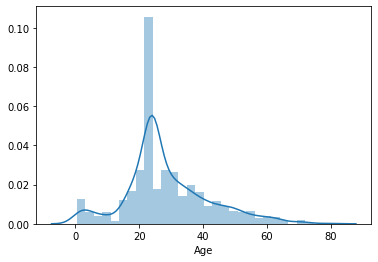

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['Age'])
plt.show()

# Encodings

In [124]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [125]:
data_names = data['Name']
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

data_id = data['PassengerId']
data = data.drop('PassengerId', axis = 1)
test_id = test['PassengerId']
test = test.drop('PassengerId', axis = 1)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [127]:
data = data.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
test = pd.get_dummies(test, columns = ['Sex', 'Embarked'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


# fare

In [128]:
data['Fare'].mode()[0]

8.05

In [129]:
#data['fare'] = data['fare'].fillna(data['fare'].mode()[0])
#test_data['fare'] = test_data['fare'].fillna(test_data['fare'].mode()[0])

In [130]:
#data['embarked'].mode()[0]

In [131]:
#data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
#test_data['embarked'] = test_data['embarked'].fillna(test_data['embarked'].mode()[0])

In [132]:
#data.info()

# Name

In [133]:
#len(np.unique(data['name']).tolist())

In [134]:
#data['name'].value_counts()

In [135]:
#data = data.drop('name', axis = 1)
#test_data = test_data.drop('name', axis = 1)


# Sex

In [136]:
#data['sex'].value_counts()

In [137]:
#label encoding
#import warnings
#warnings.filterwarnings('ignore')
#data_label = data.copy()
#data_label['sex'][data_label['sex'] == 'male'] = 0
#data_label['sex'][data_label['sex'] == 'female'] = 1

#test_data['sex'][test_data['sex'] == 'male'] = 0
#test_data['sex'][test_data['sex'] == 'female'] = 1
#test_data.head()

In [138]:
# get_dummies/one-hot encoding

#data_priority = data.copy()
#data_priority = pd.get_dummies(data_priority, columns=['sex'])
#test_data = pd.get_dummies(test_data, columns=['sex'])

In [139]:
#data_priority.head()

# Ticket

In [140]:
#data_priority = data_priority.drop(['ticket'], axis = 1)
#test_data = test_data.drop(['ticket'], axis = 1)

# Embarked

In [141]:
#data_priority['embarked'].value_counts()

In [142]:
#data_priority = pd.get_dummies(data_priority, columns=['embarked'])
#test_data = pd.get_dummies(test_data, columns=['embarked'])

In [143]:
#data_priority.info()

In [144]:
#data_priority = data_priority.drop(['passenger_id'],axis = 1)
#myId = test_data['passenger_id']
#test_data = test_data.drop(['passenger_id'],axis = 1)


In [147]:
data.shape, test.shape

((891, 11), (418, 10))

In [145]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
y = data['Survived']
x = data.drop('Survived', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [148]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

/home/odemakinde/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8047752808988764

In [149]:
grad = GradientBoostingClassifier()
grad.fit(x_train, y_train)
grad.score(x_train, y_train)

0.901685393258427

In [151]:
from sklearn.metrics import accuracy_score
pred = grad.predict(x_test)
accuracy_score(y_test, pred)

0.8100558659217877

In [152]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
lr.score(x_train, y_train)

/home/odemakinde/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8047752808988764

In [153]:
pred = rand.predict(x_test)
accuracy_score(y_test, pred)

0.7988826815642458

In [154]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
rand_pred = rand.predict(x_test)
accuracy_score(rand_pred, y_test)

0.7988826815642458

In [155]:
f1_score(rand_pred, y_test)

0.7464788732394366

In [156]:
grad_pred = grad.predict(x_test)
accuracy_score(grad_pred, y_test)

0.8100558659217877

In [157]:
f1_score(grad_pred, y_test)

0.7536231884057971

In [158]:
pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [159]:
classification_report(grad_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85       115\n           1       0.70      0.81      0.75        64\n\n    accuracy                           0.81       179\n   macro avg       0.79      0.81      0.80       179\nweighted avg       0.82      0.81      0.81       179\n'

In [160]:
accuracy_score(pred, y_test)

0.7932960893854749

In [161]:
f1_score(pred, y_test)

0.7412587412587412

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking



models = [GradientBoostingClassifier(),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [180]:
S_train, S_test = stacking(models,                   
                           x_train, y_train, test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=10, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.81944444]
    fold  1:  [0.86111111]
    fold  2:  [0.76388889]
    fold  3:  [0.90277778]
    fold  4:  [0.83098592]
    fold  5:  [0.80281690]
    fold  6:  [0.84507042]
    fold  7:  [0.83098592]
    fold  8:  [0.87142857]
    fold  9:  [0.74285714]
    ----
    MEAN:     [0.82713671] + [0.04576331]
    FULL:     [0.82724719]

model  1:     [RandomForestClassifier]
    fold  0:  [0.79166667]
    fold  1:  [0.76388889]
    fold  2:  [0.75000000]
    fold  3:  [0.86111111]
    fold  4:  [0.77464789]
    fold  5:  [0.81690141]
    fold  6:  [0.88732394]
    fold  7:  [0.85915493]
    fold  8:  [0.78571429]
    fold  9:  [0.80000000]
    ----
    MEAN:     [0.80904091] + [0.04364389]
    FULL:     [0.80898876]

model  2:     [XGBClassifier]
    fold  0:  [0.84722222]
    fold  1:  [0.80555556]
    fold

In [182]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
#print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


In [178]:
model = GradientBoostingClassifier()
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


Final prediction score: [0.81005587]


In [177]:
S_train.shape

(712, 3)

# my prediction

In [171]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [176]:
test.shape, x_train.shape

((418, 10), (712, 10))

In [183]:
#prediction = model.predict(test)

In [184]:
frame_dict = {}
myId = test_id
prediction = y_pred
frame_dict['PassengerId'] = myId
frame_dict['Survived'] = prediction

In [185]:
frame = pd.DataFrame(frame_dict)
frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [186]:
frame.to_csv('my_submission.csv', index = False)

In [187]:
os.getcwd()

'/home/odemakinde/Desktop/my write ups'

https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e 